PART 1: Perform exploratory data analysis (EDA) in Pandas

In [5]:
import seaborn
import pandas as pd

file_name = 'DRYAD_Data_Johansson_Updated2.1.csv'

df = pd.read_csv(file_name)

df.head()

,Yard,Date of Detection,Time of Detection,Species Detected,Number of the Species Detected in the Photo,Sunset Time,Sunrise Time,Number of Bird Feeders,Area of Garden (m^2),Fence Type,...,Precipitation 6,Precipitation 7,Precipitation 8,Precipitation 9,Precipitation 10,Precipitation 11,Precipitation 12,Precipitation 13,Precipitation 14,Precipitation 15
0,3,4/9/2021,13:32:00,Domestic Dog,1,19:46,6:52,0,4.65,0,...,5.0,6.0,7.0,8.0,9.0,1.0,11.0,12.0,13.0,14.0
1,3,4/9/2021,9:20:01,Gray Squirrel,1,19:46,6:52,0,4.65,0,...,5.0,6.0,7.0,8.0,9.0,1.0,11.0,12.0,13.0,14.0
2,3,4/9/2021,9:48:05,Gray Squirrel,1,19:46,6:52,0,4.65,0,...,5.0,6.0,7.0,8.0,9.0,1.0,11.0,12.0,13.0,14.0
3,3,4/9/2021,20:38:11,Rat,1,19:46,6:52,0,4.65,0,...,5.0,6.0,7.0,8.0,9.0,1.0,11.0,12.0,13.0,14.0
4,3,4/9/2021,22:02:55,Rat,1,19:46,6:52,0,4.65,0,...,5.0,6.0,7.0,8.0,9.0,1.0,11.0,12.0,13.0,14.0


In [185]:
top_species = df['Species Detected'].value_counts().head(5)

print("Top 5 species detected over the entire dataset:")
print(top_species)

Top 5 species detected over the entire dataset:
Gray Squirrel        7604
White-tailed Deer    6989
Bird                 6290
Raccoon              4854
Person               4203
Name: Species Detected, dtype: int64


In [186]:
df['Time of Detection'] = pd.to_datetime(df['Time of Detection'])
midnight_data = df[df['Time of Detection'].dt.hour == 12]
top_species_at_midnight = midnight_data['Species Detected'].value_counts().head(5)

print("Top 5 species detected at midnight (12am) over the entire dataset:")
print(top_species_at_midnight)

Top 5 species detected at midnight (12am) over the entire dataset:
Bird                 530
Gray Squirrel        411
Person               290
White-tailed Deer    164
Domestic Cat          87
Name: Species Detected, dtype: int64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Time of Detection']

df['Time of Detection'] = df['Time of Detection'].apply(lambda d: pd.to_datetime(d))

df['Time of Detection']

df['Time of Detection'].apply(lambda t: t.hour)

df['Hour of Detection'] = df['Time of Detection'].apply(lambda t: t.hour)

df['Hour of Detection']

0        13
1         9
2         9
3        20
4        22
         ..
43601     9
43602    10
43603    10
43604    16
43605    23
Name: Hour of Detection, Length: 43606, dtype: int64

In [10]:
df.groupby(['Species Detected', 'Hour of Detection']).count().loc[:, 'Yard']

Species Detected   Hour of Detection
45 Opossum         0                    136
                   1                    126
                   2                    141
                   3                    140
                   4                    126
                                       ... 
White-tailed Deer  19                   508
                   20                   418
                   21                   282
                   22                   273
                   23                   298
Name: Yard, Length: 447, dtype: int64

In [41]:
df.groupby(['Species Detected', 'Hour of Detection']).count().loc[:, 'Yard'].unstack()

Hour of Detection,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Species Detected,,,,,,,,,,,,,,,,,,,,,
45 Opossum,136.0,126.0,141.0,140.0,126.0,74.0,16.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,32.0,131.0,161.0,147.0
Beaver,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bird,11.0,10.0,3.0,13.0,13.0,99.0,263.0,362.0,425.0,462.0,...,538.0,523.0,466.0,361.0,365.0,226.0,42.0,5.0,7.0,12.0
Black Bear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Bobcat,1.0,2.0,3.0,NaN,2.0,1.0,2.0,2.0,NaN,NaN,...,NaN,NaN,2.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN
Chipmunk,NaN,NaN,2.0,NaN,NaN,23.0,64.0,78.0,54.0,38.0,...,38.0,34.0,33.0,26.0,33.0,15.0,1.0,NaN,1.0,NaN
Cottontail,35.0,29.0,29.0,21.0,29.0,61.0,48.0,53.0,45.0,45.0,...,16.0,40.0,46.0,52.0,60.0,85.0,67.0,42.0,36.0,29.0
Coyote,52.0,39.0,32.0,38.0,32.0,21.0,10.0,4.0,3.0,4.0,...,NaN,1.0,6.0,4.0,2.0,12.0,29.0,43.0,43.0,43.0
Domestic Cat,119.0,126.0,129.0,139.0,177.0,172.0,150.0,121.0,123.0,117.0,...,78.0,68.0,67.0,96.0,110.0,129.0,161.0,168.0,167.0,138.0


In [43]:
df_tmp = df.groupby(['Species Detected', 'Hour of Detection']).count().loc[:, 'Yard'].unstack().fillna(0)
df_tmp

Hour of Detection,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Species Detected,,,,,,,,,,,,,,,,,,,,,
45 Opossum,136.0,126.0,141.0,140.0,126.0,74.0,16.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,32.0,131.0,161.0,147.0
Beaver,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bird,11.0,10.0,3.0,13.0,13.0,99.0,263.0,362.0,425.0,462.0,...,538.0,523.0,466.0,361.0,365.0,226.0,42.0,5.0,7.0,12.0
Black Bear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Bobcat,1.0,2.0,3.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,...,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,2.0,0.0
Chipmunk,0.0,0.0,2.0,0.0,0.0,23.0,64.0,78.0,54.0,38.0,...,38.0,34.0,33.0,26.0,33.0,15.0,1.0,0.0,1.0,0.0
Cottontail,35.0,29.0,29.0,21.0,29.0,61.0,48.0,53.0,45.0,45.0,...,16.0,40.0,46.0,52.0,60.0,85.0,67.0,42.0,36.0,29.0
Coyote,52.0,39.0,32.0,38.0,32.0,21.0,10.0,4.0,3.0,4.0,...,0.0,1.0,6.0,4.0,2.0,12.0,29.0,43.0,43.0,43.0
Domestic Cat,119.0,126.0,129.0,139.0,177.0,172.0,150.0,121.0,123.0,117.0,...,78.0,68.0,67.0,96.0,110.0,129.0,161.0,168.0,167.0,138.0


PART 2: Perform pattern mining with the mlxtend library

In [45]:
# Categorize as 'urban' or 'rural'
df['Setting'] = df['Yard'].apply(lambda x: 'Urban' if x in df['Yard'] else 'Rural')

# Categorize as 'early evening' or 'late evening'
df['Time of Day'] = pd.cut(df['Hour of Detection'], 
                           bins=[-1, 4, 23], 
                           labels=['Late Evening', 'Early Evening'])


In [48]:

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


# Filter data for early evening
early_evening_data = df[df['Time of Day'] == 'Early Evening']

# Group data by date and species detected
transactions = early_evening_data.groupby('Date of Detection')['Species Detected'].apply(list).tolist()

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_binary = pd.DataFrame(te_ary, columns=te.columns_)

# Perform frequent pattern mining
frequent_itemsets = apriori(df_binary, min_support=0.50, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] >= 2]

print(frequent_itemsets)

      support                                           itemsets  length
11   0.607029                                 (Bird, Cottontail)       2
12   0.798722                               (Domestic Cat, Bird)       2
13   0.712460                               (Bird, Domestic Dog)       2
14   0.817891                              (Gray Squirrel, Bird)       2
15   0.638978                                  (Groundhog, Bird)       2
..        ...                                                ...     ...
581  0.546326  (Domestic Cat, Bird, Cottontail, Raccoon, Whit...       8
582  0.546326  (Bird, Cottontail, Raccoon, White-tailed Deer,...       8
583  0.597444  (Domestic Cat, Bird, Raccoon, White-tailed Dee...       8
584  0.539936  (Domestic Cat, Cottontail, Raccoon, White-tail...       8
585  0.539936  (Domestic Cat, Bird, Cottontail, Raccoon, Whit...       9

[575 rows x 3 columns]


In [49]:
# Filter data for early evening
early_evening_data = df[df['Time of Day'] == 'Early Evening']

# Filter data for urban and rural settings
urban_data = early_evening_data[early_evening_data['Setting'] == 'Urban']
rural_data = early_evening_data[early_evening_data['Setting'] == 'Rural']

# Group data by date and species detected
urban_transactions = urban_data.groupby('Date of Detection')['Species Detected'].apply(list).tolist()
rural_transactions = rural_data.groupby('Date of Detection')['Species Detected'].apply(list).tolist()

# Encode urban transactions
urban_te = TransactionEncoder()
urban_te_ary = urban_te.fit(urban_transactions).transform(urban_transactions)
urban_df_binary = pd.DataFrame(urban_te_ary, columns=urban_te.columns_)

# Encode rural transactions
rural_te = TransactionEncoder()
rural_te_ary = rural_te.fit(rural_transactions).transform(rural_transactions)
rural_df_binary = pd.DataFrame(rural_te_ary, columns=rural_te.columns_)


# Perform frequent pattern mining
urban_frequent_itemsets = apriori(urban_df_binary, min_support=0.50, use_colnames=True)
urban_frequent_itemsets['length'] = urban_frequent_itemsets['itemsets'].apply(len)
urban_frequent_itemsets = urban_frequent_itemsets[urban_frequent_itemsets['length'] >= 2]

# Perform frequent pattern mining with lower support threshold
rural_frequent_itemsets = apriori(rural_df_binary, min_support=0.10, use_colnames=True)
rural_frequent_itemsets['length'] = rural_frequent_itemsets['itemsets'].apply(len)
rural_frequent_itemsets = rural_frequent_itemsets[rural_frequent_itemsets['length'] >= 2]

print("Urban frequent itemsets:")
print(urban_frequent_itemsets)
print("\nRural frequent itemsets:")
print(rural_frequent_itemsets)


Urban frequent itemsets:
      support                                           itemsets  length
11   0.607029                                 (Bird, Cottontail)       2
12   0.798722                               (Domestic Cat, Bird)       2
13   0.712460                               (Bird, Domestic Dog)       2
14   0.817891                              (Gray Squirrel, Bird)       2
15   0.638978                                  (Groundhog, Bird)       2
..        ...                                                ...     ...
581  0.546326  (Domestic Cat, Bird, Cottontail, Raccoon, Whit...       8
582  0.546326  (Bird, Cottontail, Raccoon, White-tailed Deer,...       8
583  0.597444  (Domestic Cat, Bird, Raccoon, White-tailed Dee...       8
584  0.539936  (Domestic Cat, Cottontail, Raccoon, White-tail...       8
585  0.539936  (Domestic Cat, Bird, Cottontail, Raccoon, Whit...       9

[575 rows x 3 columns]

Rural frequent itemsets:
Empty DataFrame
Columns: [support, itemsets, leng

In [50]:
# Filter data for late evening
late_evening_data = df[df['Time of Day'] == 'Late Evening']

# Filter data for urban and rural settings
urban_data = late_evening_data[late_evening_data['Setting'] == 'Urban']
rural_data = late_evening_data[late_evening_data['Setting'] == 'Rural']

# Group data by date and species detected
urban_transactions = urban_data.groupby('Date of Detection')['Species Detected'].apply(list).tolist()
rural_transactions = rural_data.groupby('Date of Detection')['Species Detected'].apply(list).tolist()

# Encode transactions
urban_te = TransactionEncoder()
urban_te_ary = urban_te.fit(urban_transactions).transform(urban_transactions)
urban_df_binary = pd.DataFrame(urban_te_ary, columns=urban_te.columns_)

rural_te = TransactionEncoder()
rural_te_ary = rural_te.fit(rural_transactions).transform(rural_transactions)
rural_df_binary = pd.DataFrame(rural_te_ary, columns=rural_te.columns_)

# Perform frequent pattern mining
urban_frequent_itemsets = apriori(urban_df_binary, min_support=0.50, use_colnames=True)
urban_frequent_itemsets['length'] = urban_frequent_itemsets['itemsets'].apply(len)
urban_frequent_itemsets = urban_frequent_itemsets[urban_frequent_itemsets['length'] >= 2]

rural_frequent_itemsets = apriori(rural_df_binary, min_support=0.50, use_colnames=True)
rural_frequent_itemsets['length'] = rural_frequent_itemsets['itemsets'].apply(len)
rural_frequent_itemsets = rural_frequent_itemsets[rural_frequent_itemsets['length'] >= 2]

print("Urban frequent itemsets:")
print(urban_frequent_itemsets)
print("\nRural frequent itemsets:")
print(rural_frequent_itemsets)


Urban frequent itemsets:
     support                                           itemsets  length
5   0.612100              (Domestic Cat, Nine-banded Armadillo)       2
6   0.693950                            (Domestic Cat, Raccoon)       2
7   0.644128                  (White-tailed Deer, Domestic Cat)       2
8   0.697509                   (Nine-banded Armadillo, Raccoon)       2
9   0.658363         (White-tailed Deer, Nine-banded Armadillo)       2
10  0.505338                                 (Red Fox, Raccoon)       2
11  0.733096                       (White-tailed Deer, Raccoon)       2
12  0.612100     (Domestic Cat, Nine-banded Armadillo, Raccoon)       3
13  0.580071  (White-tailed Deer, Domestic Cat, Nine-banded ...       3
14  0.633452         (White-tailed Deer, Domestic Cat, Raccoon)       3
15  0.658363  (White-tailed Deer, Nine-banded Armadillo, Rac...       3
16  0.580071  (White-tailed Deer, Domestic Cat, Nine-banded ...       4

Rural frequent itemsets:
Empty DataFra

In [51]:
# Function to get the itemset with highest support
def get_highest_support_itemset(frequent_itemsets):
    if frequent_itemsets.empty:
        return 'None', 0
    highest_support_row = frequent_itemsets.loc[frequent_itemsets['support'].idxmax()]
    highest_support_itemset = ', '.join(sorted(highest_support_row['itemsets']))
    highest_support = highest_support_row['support']
    return highest_support_itemset, highest_support

# Get the itemset with highest support for each category
urban_early_highest_support_itemset, urban_early_highest_support = get_highest_support_itemset(urban_frequent_itemsets)
urban_late_highest_support_itemset, urban_late_highest_support = get_highest_support_itemset(urban_frequent_itemsets)
rural_early_highest_support_itemset, rural_early_highest_support = get_highest_support_itemset(rural_frequent_itemsets)
rural_late_highest_support_itemset, rural_late_highest_support = get_highest_support_itemset(rural_frequent_itemsets)

# Fill in the table
table = pd.DataFrame({
    'Time of Day': ['Early Evening', 'Late Evening'],
    'Urban': [(urban_early_highest_support_itemset, urban_early_highest_support), (urban_late_highest_support_itemset, urban_late_highest_support)],
    'Rural': [(rural_early_highest_support_itemset, rural_early_highest_support), (rural_late_highest_support_itemset, rural_late_highest_support)],
})
print(table)

     Time of Day                                             Urban      Rural
0  Early Evening  (Raccoon, White-tailed Deer, 0.7330960854092526)  (None, 0)
1   Late Evening  (Raccoon, White-tailed Deer, 0.7330960854092526)  (None, 0)


PART 1: (CON'T) :: Perform exploratory data analysis (EDA) in Pandas

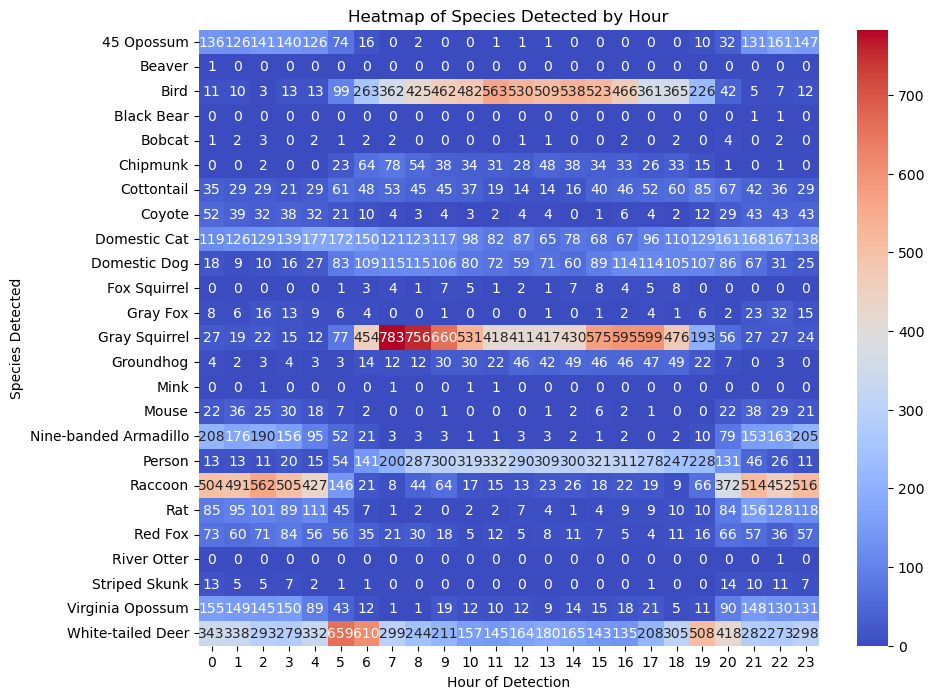

In [193]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_tmp, annot=True, cmap='coolwarm', fmt='.0f')

# Add labels and title
plt.xlabel('Hour of Detection')
plt.ylabel('Species Detected')
plt.title('Heatmap of Species Detected by Hour')

# Show the plot
plt.show()

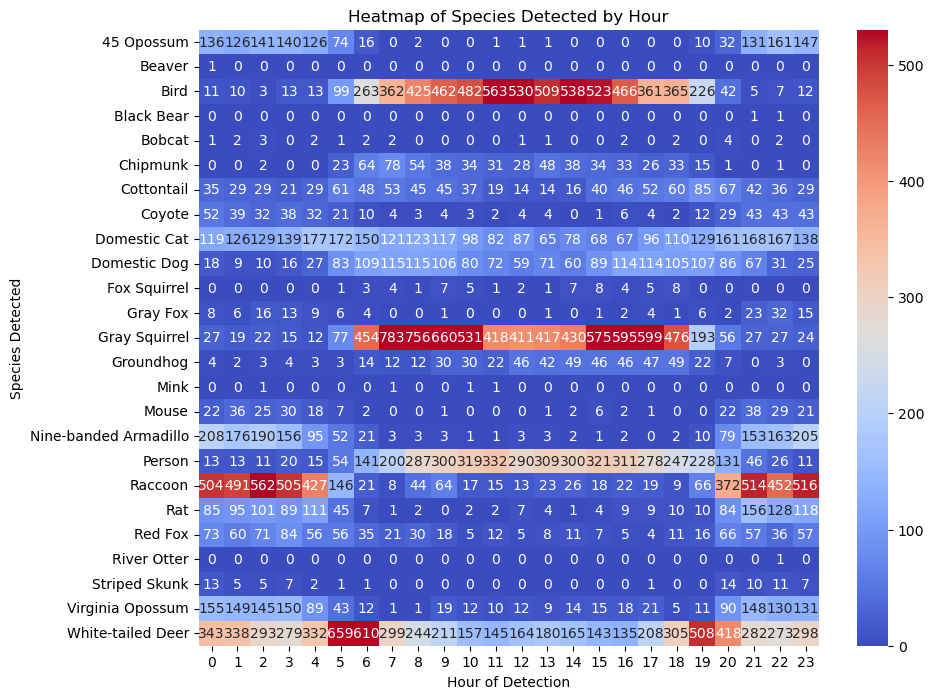

In [194]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_tmp, annot=True, cmap='coolwarm', fmt='.0f', robust=True)

# Add labels and title
plt.xlabel('Hour of Detection')
plt.ylabel('Species Detected')
plt.title('Heatmap of Species Detected by Hour')

# Show the plot
plt.show()

In [195]:
mode_species = df['Species Detected'].mode()
# Display the result
print("Mode of Species Detected:")
print(mode_species)

Mode of Species Detected:
0    Gray Squirrel
Name: Species Detected, dtype: object


In [196]:

import pandas as pd

# Filter the data into two groups
urban_df = df.query('`Forest Cover within 1.5km of camera (km^2)` < 0.3')
rural_df = df.query('`Forest Cover within 1.5km of camera (km^2)` >= 0.3')

# Calculate the probability for each species in the urban group
urban_probs = urban_df['Species Detected'].value_counts(normalize=True)
# Calculate the probability for each species in the rural group
rural_probs = rural_df['Species Detected'].value_counts(normalize=True)

# Convert the probability Series to DataFrames
urban_probs_df = urban_probs.reset_index()
urban_probs_df.columns = ['Species Detected', 'Urban Probability']

rural_probs_df = rural_probs.reset_index()
rural_probs_df.columns = ['Species Detected', 'Rural Probability']

# Merge the probability DataFrames into a single DataFrame
probs_df = pd.merge(urban_probs_df, rural_probs_df, on='Species Detected')

# Print the resulting DataFrame
print(probs_df)



         Species Detected  Urban Probability  Rural Probability
0           Gray Squirrel           0.171598           0.185666
1                    Bird           0.167167           0.051258
2       White-tailed Deer           0.127262           0.294213
3                  Person           0.106337           0.056013
4                 Raccoon           0.096590           0.171054
5            Domestic Cat           0.075265           0.029456
6            Domestic Dog           0.045393           0.011597
7              45 Opossum           0.032987           0.010553
8        Virginia Opossum           0.030815           0.036182
9   Nine-banded Armadillo           0.027470           0.066218
10                    Rat           0.025298           0.022614
11             Cottontail           0.022211           0.020295
12                Red Fox           0.022039           0.003827
13               Chipmunk           0.014922           0.006842
14              Groundhog           0.01

In [225]:
df.groupby(['Species Detected', 'Hour of Detection']).count().loc[:, 'Yard']

Species Detected   Hour of Detection
45 Opossum         0                    136
                   1                    126
                   2                    141
                   3                    140
                   4                    126
                                       ... 
White-tailed Deer  19                   508
                   20                   418
                   21                   282
                   22                   273
                   23                   298
Name: Yard, Length: 447, dtype: int64